<h1> UFO Sightings 🛸 </h1>
<h3> Exploratory Data Analysis (EDA) </h3>

Data obtained from [Kaggle](https://www.kaggle.com/datasets/ogunkoya/ufo-1149)

Some questions I would like to answer with this dataset: </b>
1. What time periods are captured in this dataset? <br>
2. Are there multiple reports from the same day? <br>
3. Do most sightings occur during the day or at night? <br>
4. What states have the most sightings? <br>
5. How long do sightings last on average? <br>


First, import packages & libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import warnings
import seaborn as sns

<h4>Step 1: Exploring Data Available</h4>

In [2]:
# first, import the data into a pandas dataframe
df = pd.read_csv('UFO-1149.csv')

In [3]:
# first 10 records in the dataframe
df.head(10)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8831,-97.9411
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.3842,-98.5811
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2000,-2.9167
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783,-96.6458
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4181,-157.8036
5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950,-82.1889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.4347,-3.1800
7,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175,-73.4083
8,10/10/1966 20:00,pell city,al,us,disk,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861,-86.2861
9,10/10/1966 21:00,live oak,fl,us,disk,120.0,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947,-82.9842


In [4]:
# number of rows and columns
df.shape

(80332, 11)

In [5]:
# reviewing all columns, data types, and amount of records in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  float64
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80318 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  float64
 10  longitude             80332 non-null  float64
dtypes: float64(3), object(8)
memory usage: 6.7+ MB


In [6]:
# missing values in each column
df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  14
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [7]:
# unique records in each column
df.nunique()

datetime                69586
city                    19900
state                      67
country                     5
shape                      29
duration (seconds)        533
duration (hours/min)     8304
comments                79998
date posted               317
latitude                17834
longitude               19192
dtype: int64

<b>Quick Observations: </b>
- Slightly over 80,000 records with some missing data in `state`, `country`, `shape`, and `comments`<br>
- Need to separate `dateteime` to individual *date* and *time* columns<br>
- Time format for `duration (hours/min)` has too many variations<br>
- There appear to 67 unique states, more than the standard 50 US states<br>
<br>
<br>
<p>These will all be addressed in the next section

<hr>

<h4>Section 2: Data Cleaning and Transformation</h4>

In [8]:
#replace 24:00 hours with 0:00 in order to use datetime features
df['fix_time'] = df['datetime'].str.replace('24:00', '0:00')

#recasting data type to datetime
df['tempdatetime'] = pd.to_datetime(df['fix_time'])

#items that contain 24:00 hour only
rows = df['datetime'].str.contains('24:00')

#applying update to fix the hour and save to a new column
df['datetime_updated'] = df['tempdatetime'] + rows * timedelta(days=1)

In [9]:
# splitting datetime column to new 'date' column
df['date'] = pd.to_datetime(df['datetime_updated']).dt.date

In [10]:
# creating a new column from the split above for 'time'
df['time'] = pd.to_datetime(df['datetime_updated']).dt.time

In [11]:
# recasting datatype
df['date posted'] = pd.to_datetime(df['date posted']).dt.date

In [12]:
# creating a new column that shows which day of the week sightings occurred
df['day'] = df['datetime_updated'].dt.day_name()

There’s a lot of inconsistencies with how data under `city`, `state`, `country` was recorded. Doing a few cleanup items but will mainly rely on latitude & longitude information. A few things to note:
</p>

- Including PR in list of US states
    - Although it's a territory not a state, it’s currently included under country US
    - Adding it to the list will ensure that the `c1` & `c2` conditions apply US as the country if it’s blank
- All other non-us states under `state` appear to be from other countries

In [13]:
# looking at all the unique values under state
df['state'].unique()

array(['tx', nan, 'hi', 'tn', 'ct', 'al', 'fl', 'ca', 'nc', 'ny', 'ky',
       'mi', 'ma', 'ks', 'sc', 'wa', 'ab', 'co', 'nh', 'wi', 'me', 'ga',
       'pa', 'il', 'ar', 'on', 'mo', 'oh', 'in', 'az', 'mn', 'nv', 'nf',
       'ne', 'or', 'bc', 'ia', 'va', 'id', 'nm', 'nj', 'mb', 'wv', 'ok',
       'ri', 'nb', 'vt', 'la', 'pr', 'ak', 'ms', 'ut', 'md', 'mt', 'sk',
       'wy', 'sd', 'pq', 'ns', 'qc', 'de', 'nd', 'dc', 'nt', 'sa', 'yt',
       'yk', 'pe'], dtype=object)

In [14]:
# setting a list of us states (plus pr for Puerto Rico)
states = [ 'ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
           'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me',
           'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm',
           'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
           'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy', 'pr']

In [15]:
# adding country as 'us' on records where the country is NULL and the state is listed in variable above
c1 = df['country'].isna()
c2 = df['state'].isin(states)

df['country'] = df['country'].mask(c1 & c2, 'us')

In [16]:
# redoing 'duration (seconds)' to a more descriptive column
def time(x):
    min, sec = divmod(x, 60)
    hour, min = divmod(min, 60)
    new_time =  '%d:%02d:%02d' % (hour, min, sec)  #saves time in HH:MM:SS format
    return new_time

df['duration'] = df['duration (seconds)'].apply(time)

In [17]:
# dropping columns that won't be needed
df.drop(['datetime', 'fix_time', 'tempdatetime'], axis = 1, inplace=True)

Dropping rows with missing data from `shape` and `comments`. There’s missing values in `state` and `country` as well, however there’s latitude & longitude data that can be used instead. 

In [18]:
# removing rows with missing data in the following columns
df.dropna(how='any', axis = 0, subset=['shape', 'comments'], inplace=True)

In [19]:
# confirming all updates
df.tail()

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,datetime_updated,date,time,day,duration
80327,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658,-86.7844,2013-09-09 21:15:00,2013-09-09,21:15:00,Monday,0:10:00
80328,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136,-116.2025,2013-09-09 22:00:00,2013-09-09,22:00:00,Monday,0:20:00
80329,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.2972,-122.2844,2013-09-09 22:00:00,2013-09-09,22:00:00,Monday,0:20:00
80330,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011,-77.2656,2013-09-09 22:20:00,2013-09-09,22:20:00,Monday,0:00:05
80331,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,2013-09-30,35.6528,-97.4778,2013-09-09 23:00:00,2013-09-09,23:00:00,Monday,0:17:00


In [20]:
df.isnull().sum()

city                       0
state                   5658
country                 3764
shape                      0
duration (seconds)         0
duration (hours/min)       0
comments                   0
date posted                0
latitude                   0
longitude                  0
datetime_updated           0
date                       0
time                       0
day                        0
duration                   0
dtype: int64

<hr>

<h4>Section 3: Analysis & Visualization</h4>

<p><b>1. What time periods are captured in this dataset?</b></p>

In [21]:
df['date'].agg(['min', 'max'])

min    1906-11-11
max    2014-05-08
Name: date, dtype: object

In [22]:
df['date posted'].agg(['min', 'max'])

min    1998-03-07
max    2014-05-08
Name: date posted, dtype: object

<p>This dataset has sightings from 1906 through 2014. The date of occurrence doesn’t always align with the date posted. The earliest posted record was from 1998, whereas the earliest sighting is from 1906. </br>
<br>
<p><b>2. Are there multiple reports from the same day?</b>


In [23]:
print("Number of unique date variations: ",df['date'].nunique())

Number of unique date variations:  10382


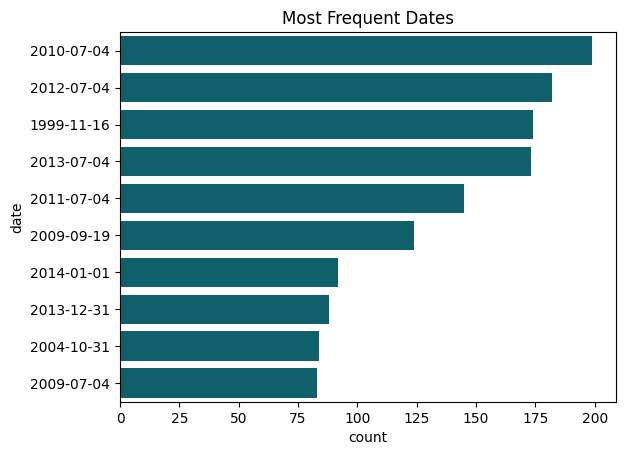

In [24]:
#looking at first 10 dates with the most sightings

sns.countplot(data=df, y='date', order=df.date.value_counts()[:10].index, color='#006C7A').set_title('Most Frequent Dates');

<p>July 4th seems to be a hot day for UFO sightings! Wonder if that has to do with fireworks in the US for Independence Day. Something to look more into, possibly see which countries the sightings are from.

Created a dataframe for the day with the most occurrences, then counted which country was most referenced. As suspected, most records are from the US.

In [25]:
us4th = df[df['datetime_updated'].dt.strftime('%Y-%m-%d') == '2010-07-04']
us4th['country'].value_counts()

us    196
ca      3
Name: country, dtype: int64

<p><b>3. Do most sightings occur during the day or at night?</b>

To answer this question, time needs to be separated into a day/night column. Items labeled *Day* will be sightings between 06:00 - 18:00, *Night* 18:00 - 06:00.

In [26]:
# first find items in hour 6 - 18 & label as Day, else label as Night
warnings.filterwarnings("ignore")

df['day_night'] = df['datetime_updated'].dt.hour.between(6, 18, inclusive=True)
df['day_night'] = df['day_night'].replace({True: "Day", False: "Night"})

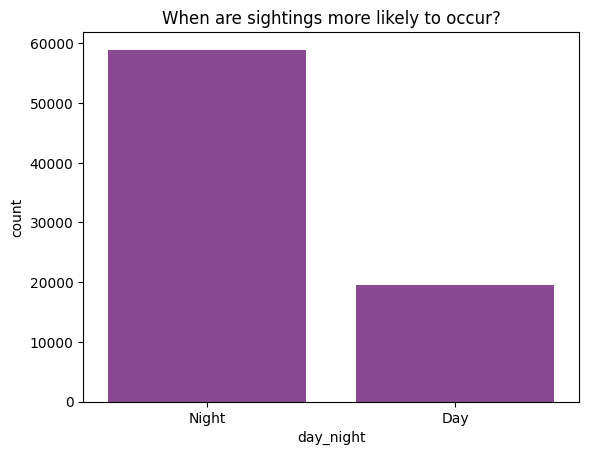

In [27]:
sns.countplot(data=df, x='day_night', order=df.day_night.value_counts().index, color='#943ba1').set_title('When are sightings more likely to occur?');

<p><b>4. What states have the most sightings?

In [28]:
# looking at data in the US only
usa_df = df[df['state'].isin(states)]

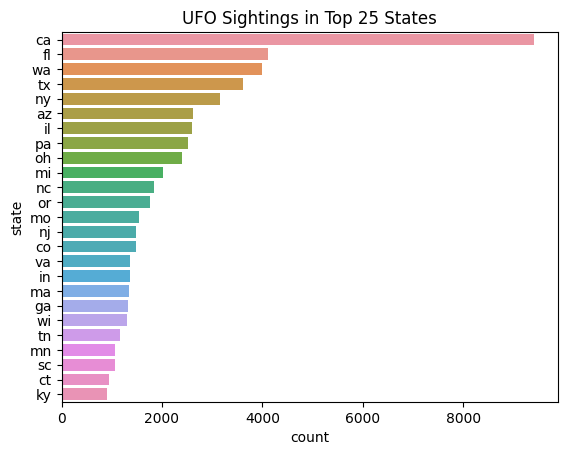

In [29]:
sns.countplot(data=usa_df, y='state', order=usa_df.state.value_counts()[:25].index).set_title('UFO Sightings in Top 25 States');

<p><b>5. How long do sightings last on average?

Reusing the time() function from section 2 to convert the mean that was calculated from `duration (seconds)`

In [30]:
time_mean = df['duration (seconds)'].mean()
print(time_mean)
print("The average UFO sighting durations is: ",time(time_mean))

8083.509932787367
The average UFO sighting durations is:  2:14:43


<p>The longest sighting shows a duration of 31 years. However, it is unlikely that a single sighting lasted that long. 

In [31]:
df.sort_values('duration (seconds)', ascending=False)[:10]

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,datetime_updated,date,time,day,duration,day_night
559,birmingham (uk/england),NaN,gb,sphere,97836000.0,31 years,Firstly&#44 I was stunned and stared at the ob...,2013-04-12,52.4667,-1.9167,1983-10-01 17:00:00,1983-10-01,17:00:00,Saturday,27176:40:00,Day
53384,ottawa (canada),on,ca,other,82800000.0,23000hrs,((HOAX??)) I was out in a field near mil&#44 ...,2010-07-06,45.4167,-75.7000,2010-06-03 23:30:00,2010-06-03,23:30:00,Thursday,23000:00:00,Night
74660,greenbrier,ar,us,light,66276000.0,21 years,Orange or amber balls or orbs of light multipl...,2008-03-31,35.2339,-92.3875,1991-09-15 18:00:00,1991-09-15,18:00:00,Sunday,18410:00:00,Day
69215,englewood,fl,us,light,52623200.0,2 months,bright stars&#44 moving erratically&#44 over t...,2002-08-28,26.9617,-82.3528,2002-08-24 01:00:00,2002-08-24,01:00:00,Saturday,14617:33:20,Night
64390,finley,wa,us,light,52623200.0,2 months,There have been several flying objects in a pe...,2012-08-19,46.1542,-119.0328,2012-08-10 21:00:00,2012-08-10,21:00:00,Friday,14617:33:20,Night
52709,somerset (uk/england),NaN,gb,cone,25248000.0,8 years,First time it was a bright light and missing t...,2009-08-05,51.0833,-3.0000,1969-06-30 22:45:00,1969-06-30,22:45:00,Monday,7013:20:00,Night
71172,virginia beach,va,us,fireball,10526400.0,4 months,this object was very high up and emmited no so...,2008-08-12,36.8528,-75.9783,2008-08-03 21:00:00,2008-08-03,21:00:00,Sunday,2924:00:00,Night
30596,menifee,ca,us,unknown,10526400.0,4 months,Sun City / Menifee UFO sightings in 1994,2005-02-22,33.7283,-117.1456,1994-03-01 01:00:00,1994-03-01,01:00:00,Tuesday,2924:00:00,Night
6991,oklahoma,ok,us,circle,10526400.0,4 months,Bright flying orb.,2013-10-14,35.4676,-97.5164,2013-10-07 20:00:00,2013-10-07,20:00:00,Monday,2924:00:00,Night
54009,mostar (bosnia/herzogovina),NaN,NaN,sphere,9468000.0,3 years,Sky Watching of Another Kind,2013-07-03,43.3423,17.8128,2013-06-06 00:00:00,2013-06-06,00:00:00,Thursday,2630:00:00,Night


Just for fun. Creating a word cloud from comments provided for each sighting.

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

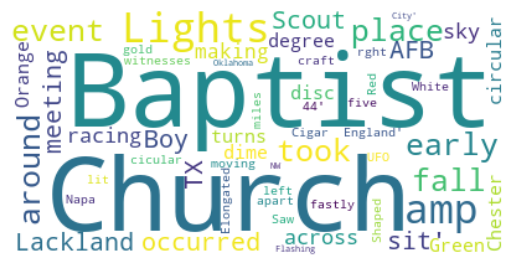

In [33]:
words = df['comments'].values
wordcloud = WordCloud(background_color='white').generate(str(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

------

Lastly: Saving all updates to a new csv file

In [34]:
df.to_csv('clean_ufo_data.csv', index=False)